In [165]:
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
import os
os.getcwd()

os.chdir("/home/piai/바탕화면/Bigdata/01 실습파일/2. Big Data 분석")

In [103]:
df = pd.read_csv('Car.csv',encoding='euc-kr')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [104]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [105]:
# 요약 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [106]:
# 브랜드만 남게 split
df['Name'] = df['Name'].str.split(' ').str[0]
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [107]:
#New_Price를 drop!
df = df.drop('New_Price', axis=1)
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0


In [108]:
# 단위빼고 숫자만 나오게
df['Mileage'] = pd.to_numeric(df['Mileage'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0


In [109]:
#Owner_Type을 dummy화
df = pd.get_dummies(df, columns=['Owner_Type'])
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,26.60,998.0,58.16,5.0,1,0,0,0
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,19.67,1582.0,126.20,5.0,1,0,0,0
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,18.20,1199.0,88.70,5.0,1,0,0,0
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,20.77,1248.0,88.76,7.0,1,0,0,0
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,5.0,0,0,1,0


In [110]:
# 각 브랜드 카운트
brand_counts_df = df['Name'].value_counts().reset_index()
brand_counts_df.columns = ['Name', 'Count']  # 컬럼명 변경

brand_counts_df.head()

,Name,Count
0,Maruti,1444
1,Hyundai,1340
2,Honda,743
3,Toyota,507
4,Mercedes-Benz,380


In [111]:
#Location에 뭐가 있나 보기
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [112]:
# NaN 제거 후 평균값과 중앙값
mean_price = df['Price'].dropna().mean() 
median_price = df['Price'].dropna().median()  

print("평균 가격:", mean_price)
print("중앙값 가격:", median_price)

평균 가격: 14912.514749999998
중앙값 가격: 8814.52


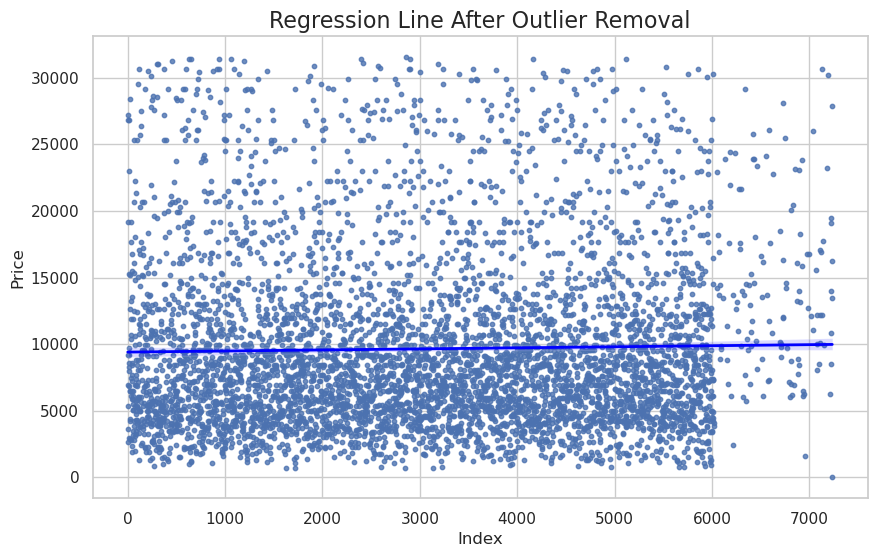

In [113]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

spline = UnivariateSpline(df_no_outliers.index, df_no_outliers['Price'], s=0.5)

plt.figure(figsize=(10, 6))
sns.regplot(x=df_no_outliers.index, y=df_no_outliers['Price'], scatter_kws={'s': 10}, line_kws={'color': 'blue', 'lw': 2})

# 그래프 제목 및 레이블
plt.title('Regression Line After Outlier Removal', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [114]:
# 각 Location별 Price 평균이 어떻게 되는지
location_price_df = df.groupby('Location', as_index=False)['Price'].mean()
location_price_df = location_price_df.sort_values(by='Price', ascending=False)

location_price_df['Price'] = location_price_df['Price'].round(2)  # 소수점 2자리 반올림

location_price_df

,Location,Price
3,Coimbatore,23700.44
1,Bangalore,20414.49
7,Kochi,17285.52
5,Hyderabad,15396.71
4,Delhi,15342.38
9,Mumbai,15030.46
0,Ahmedabad,13796.77
2,Chennai,11901.07
10,Pune,10615.75
6,Jaipur,9121.47


In [115]:
df_dummy = pd.get_dummies(df, drop_first = True)
df_dummy.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2682.68,2010,72000,26.60,998.0,58.16,5.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,19162.00,2015,41000,19.67,1582.0,126.20,5.0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
2,6898.32,2011,46000,18.20,1199.0,88.70,5.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,9197.76,2012,87000,20.77,1248.0,88.76,7.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,27194.71,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [116]:
df_y = df_dummy["Price"]
df_x = df_dummy.drop("Price", axis = 1)

In [117]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                                test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (5077, 56)
train data Y size : (5077,)
test data X size : (2176, 56)
test data Y size : (2176,)


---

----

### 데이터 전처리한 파일

In [121]:
df = pd.read_csv('car_1.csv',encoding='euc-kr')
df.head()

,Brand,Indian_Brand,Country,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Name
0,Maruti,0,India,Mumbai,2682.68,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,Maruti Wagon R LXI CNG
1,Hyundai,1,South Korea,Pune,19162.00,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,Hyundai Creta 1.6 CRDi SX Option
2,Honda,1,Japan,Chennai,6898.32,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,Honda Jazz V
3,Maruti,0,India,Chennai,9197.76,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,Maruti Ertiga VDI
4,Audi,1,Germany,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,Audi A4 New 2.0 TDI Multitronic


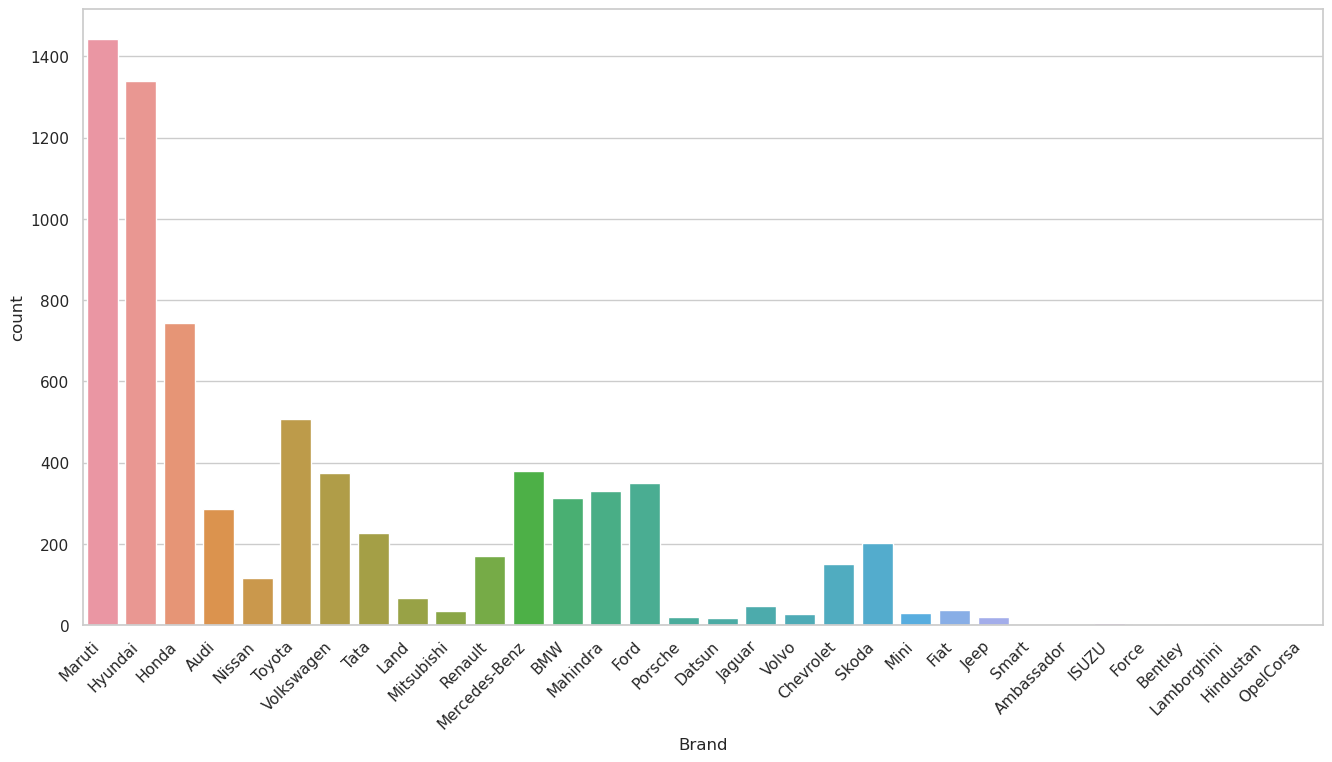

In [128]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Brand',  data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='Indian_Brand', ylabel='count'>

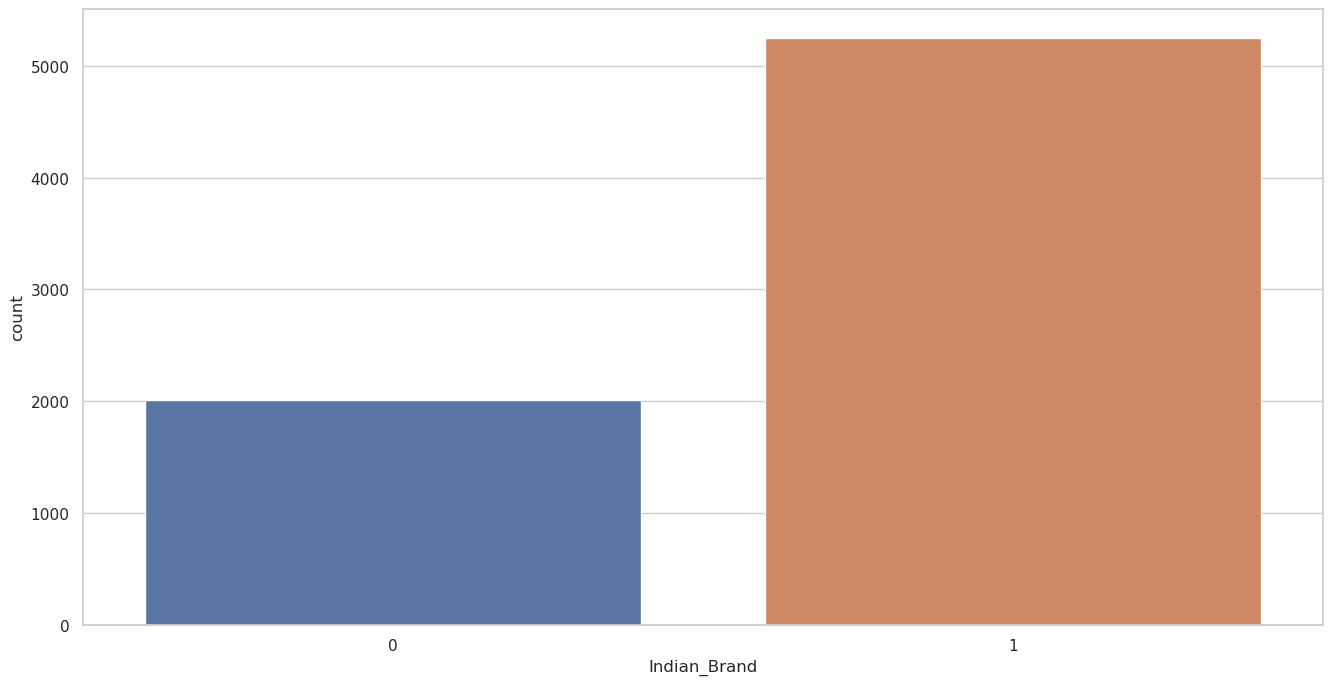

In [130]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Indian_Brand',  data=df)

<Axes: xlabel='Owner_Type', ylabel='count'>

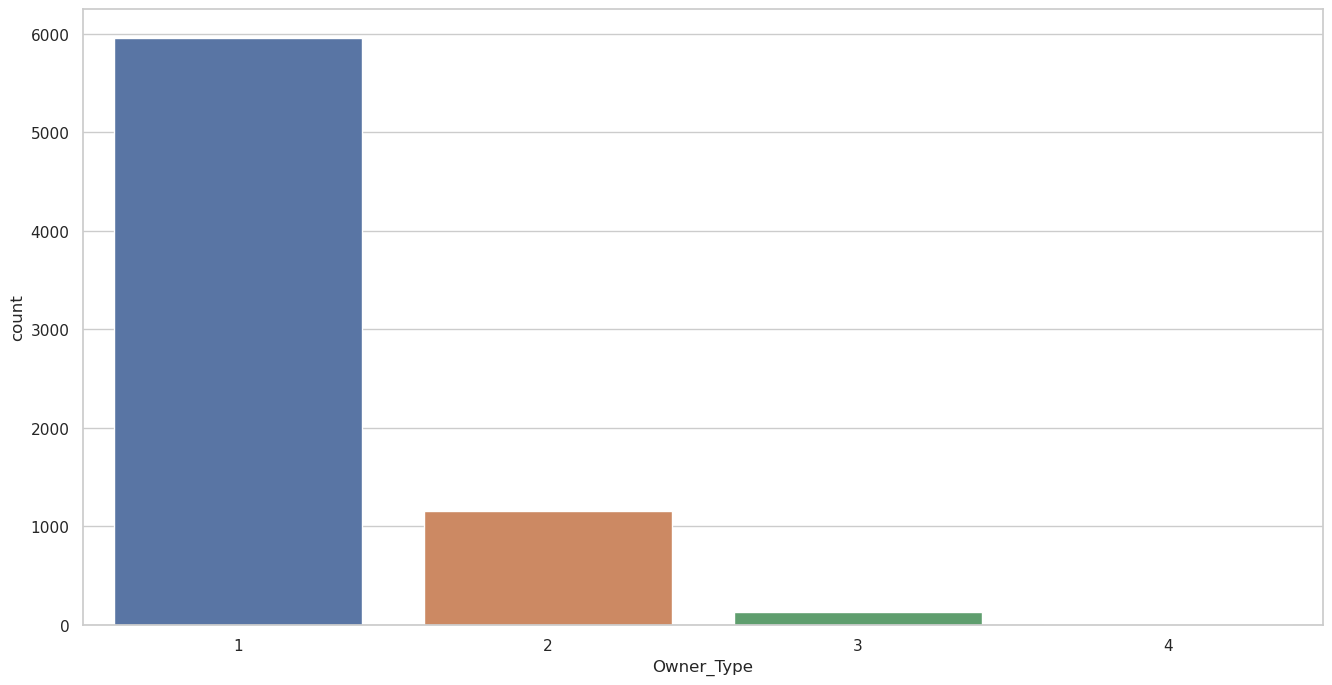

In [140]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Owner_Type',  data=df)

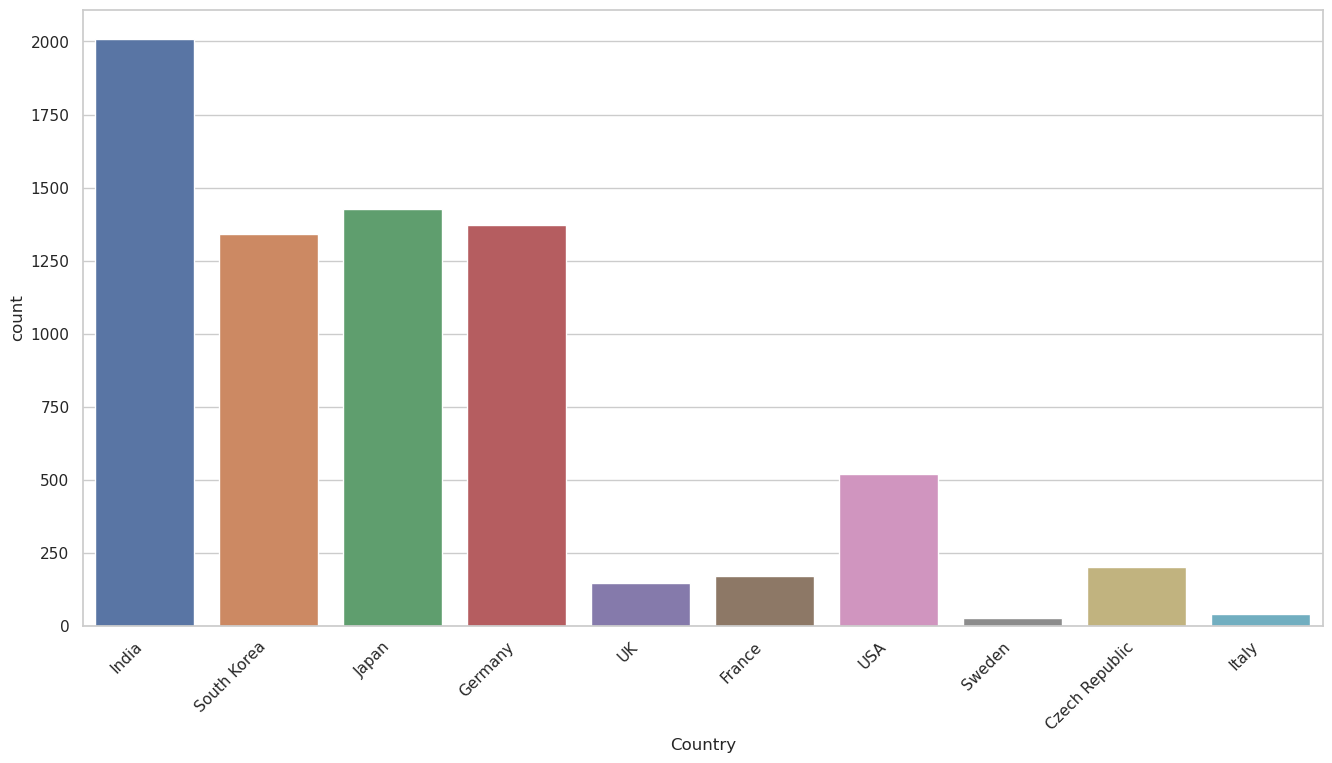

In [131]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Country',  data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

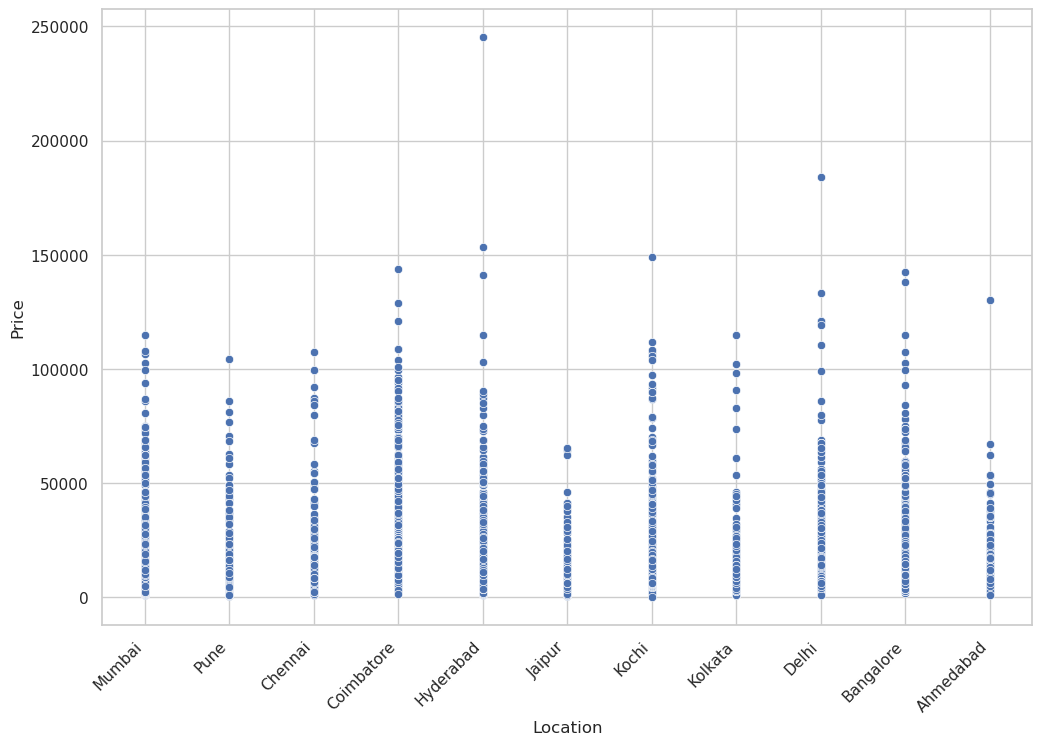

In [136]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = "Location", y = "Price", data = df)
plt.xticks(rotation=45, ha='right')
plt.show()

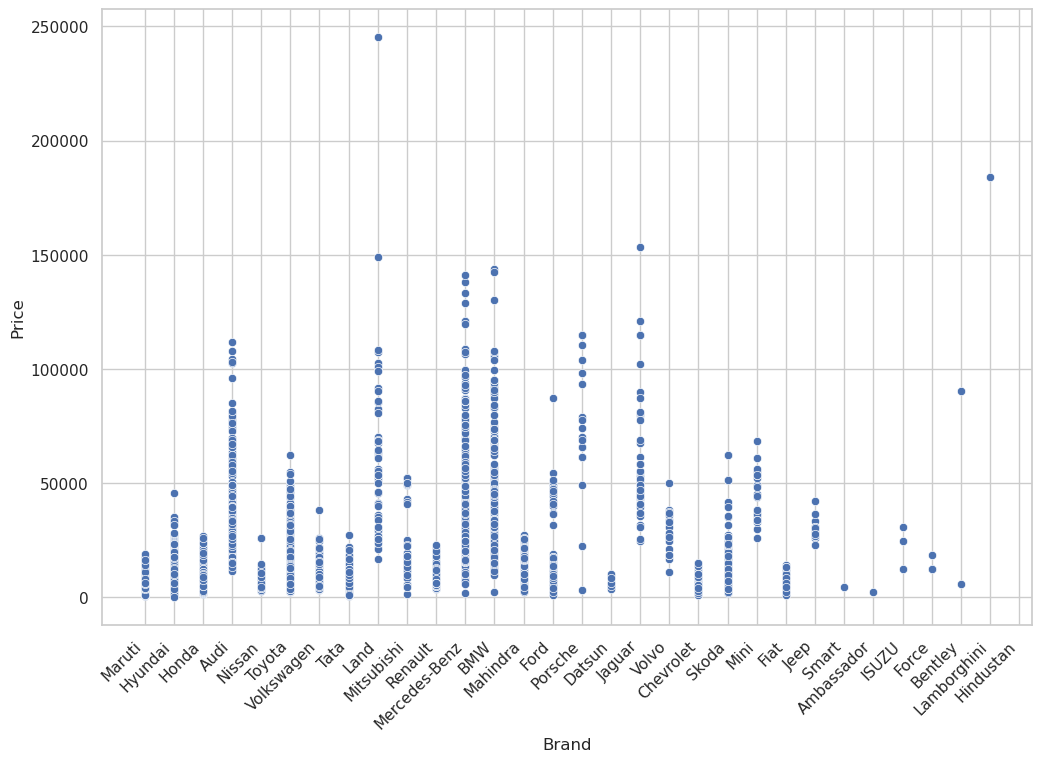

In [137]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = "Brand", y = "Price", data = df)
plt.xticks(rotation=45, ha='right')
plt.show()

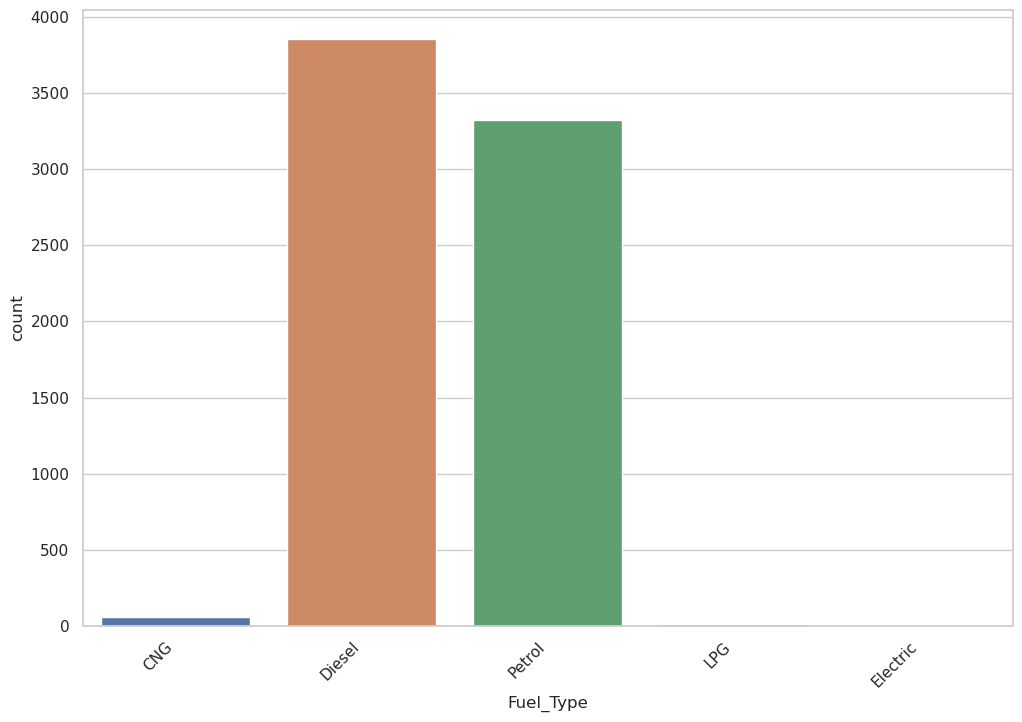

In [139]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Fuel_Type',  data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

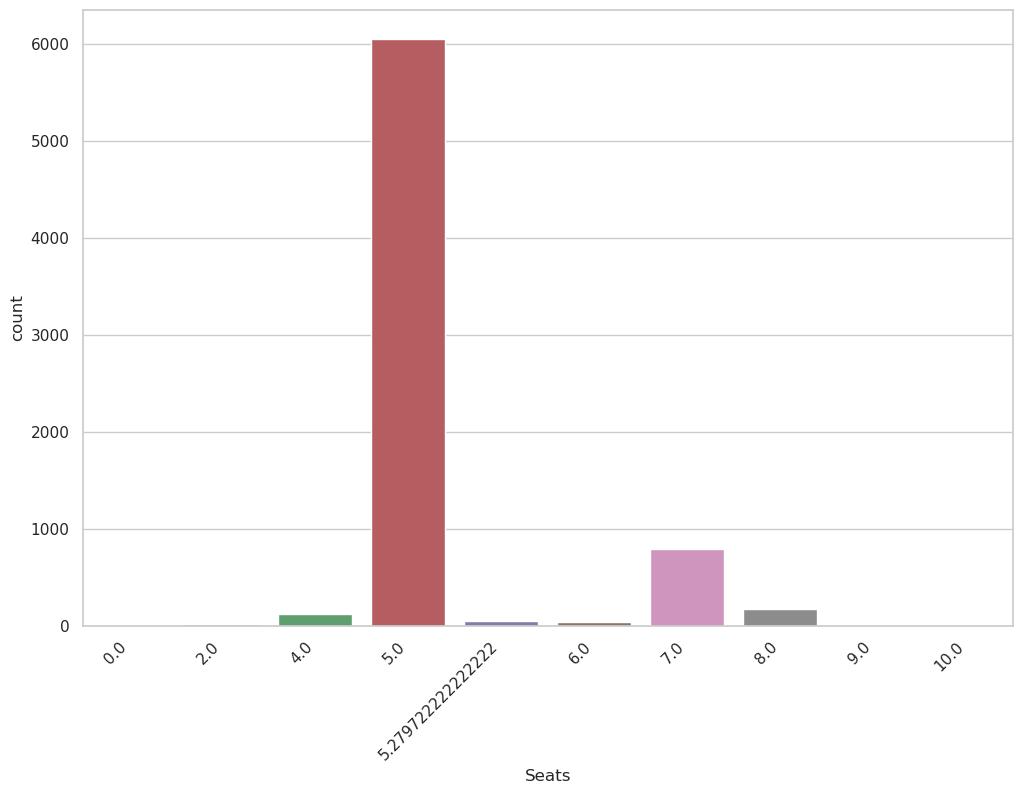

In [142]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Seats',  data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipykernel_18553/3029122843.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

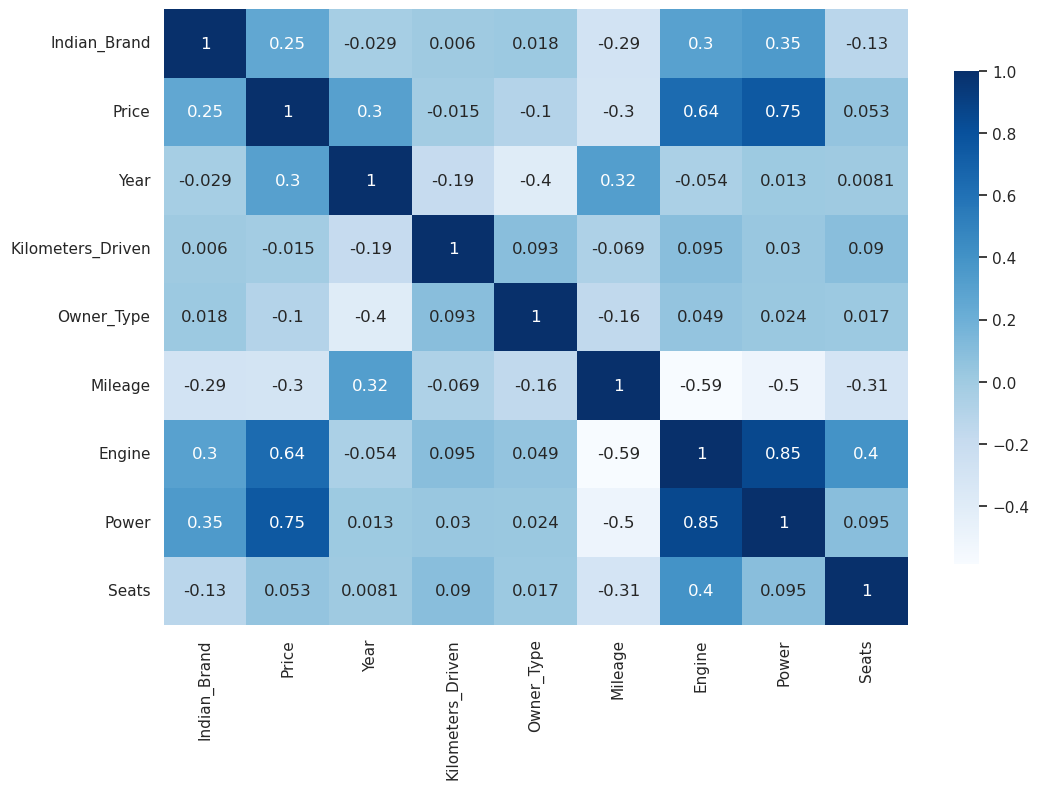

In [149]:
plt.figure(figsize=(12, 8))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap="Blues", cbar_kws={'shrink': 0.8})

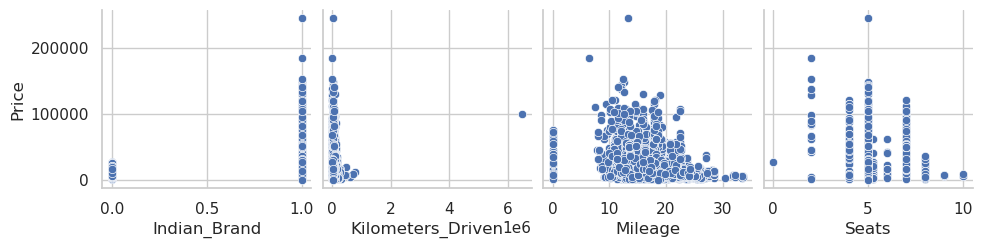

In [150]:
sns.pairplot(df, y_vars="Price", x_vars=["Indian_Brand", "Kilometers_Driven", "Mileage", "Seats"])

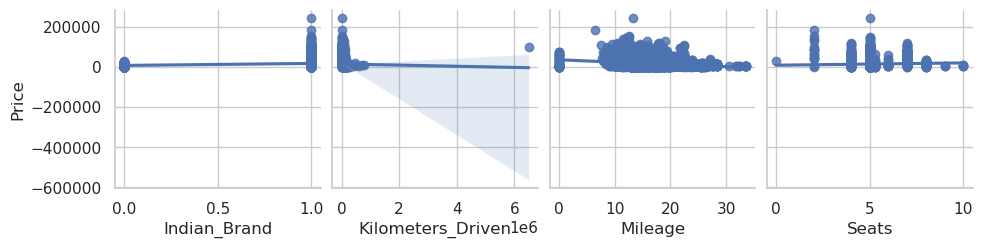

In [152]:
sns.pairplot(df, y_vars="Price", x_vars=["Indian_Brand", "Kilometers_Driven", "Mileage", "Seats"], kind="reg")

In [153]:
df.corr().round(3)

/tmp/ipykernel_18553/352886112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(3)


,Indian_Brand,Price,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats
Indian_Brand,1.000,0.251,-0.029,0.006,0.018,-0.288,0.295,0.350,-0.131
Price,0.251,1.000,0.303,-0.015,-0.101,-0.300,0.639,0.750,0.053
Year,-0.029,0.303,1.000,-0.188,-0.395,0.322,-0.054,0.013,0.008
Kilometers_Driven,0.006,-0.015,-0.188,1.000,0.093,-0.069,0.095,0.030,0.090
Owner_Type,0.018,-0.101,-0.395,0.093,1.000,-0.162,0.049,0.024,0.017
Mileage,-0.288,-0.300,0.322,-0.069,-0.162,1.000,-0.585,-0.502,-0.306
Engine,0.295,0.639,-0.054,0.095,0.049,-0.585,1.000,0.853,0.399
Power,0.350,0.750,0.013,0.030,0.024,-0.502,0.853,1.000,0.095
Seats,-0.131,0.053,0.008,0.090,0.017,-0.306,0.399,0.095,1.000


In [167]:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (5077, 15)
test data size : (2176, 15)


In [168]:
reg_model = smf.ols(formula = "Price ~Indian_Brand+Year+Kilometers_Driven+Owner_Type+ Mileage +Engine+Power+Seats", data = df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1461.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:58:59   Log-Likelihood:                -66145.
No. Observations:                6200   AIC:                         1.323e+05
Df Residuals:                    6191   BIC:                         1.324e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.436e+06   9.68e+0